# TOY PROJECT 06 - News Summarization

## 1. Library and File Import

In [3]:
! pip install bs4

  Using cached bs4-0.0.1.tar.gz (1.1 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached beautifulsoup4-4.12.2-py3-none-any.whl (142 kB)
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1266 sha256=e954485f82f9f6728a5275a2182b4f184c4190163b3f8fa97270c97c8f93a6ca
  Stored in directory: c:\users\kjaeh\appdata\local\pip\cache\wheels\25\42\45\b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4


In [1]:
# Data Handling and Visualization
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Text Preprocessing
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 

# Building Model
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kjaeh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


ModuleNotFoundError: No module named 'bs4'

In [ ]:
# Download the data
'''
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/" \
                           "News_Summary/master/news_summary_more.csv", \
                           filename="news_summary_more.csv")
'''

data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98401 entries, 0 to 98400
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   headlines  98401 non-null  object
 1   text       98401 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [ ]:
# See some sample text & headlines
print(f"Headline Sample: {data['headlines'][0]}\n")
print(f"Text Sample: {data['text'][0]}")


Headline Sample: upGrad learner switches to career in ML & Al with 90% salary hike

Text Sample: Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers.


## 2. Preprocessing for Abstract Summarization

### 2.1. Drop Overlapped Data & Impute Missing Values

In [ ]:
# Original Dataset
print(f"Data Length (Initial): {len(data)}")

# Drop Overlapped data 
data.drop_duplicates(inplace=True)
print(f"Data Length (Dropped_Duplicates): {len(data)}")

# Impute Missing Values - No missing value
data.isnull().sum()


Data Length (Initial): 98401
Data Length (Dropped_Duplicates): 98379


headlines    0
text         0
dtype: int64

### 2.2. Normalization, Stopwords, Processing

#### 2.2.1. Contractions & Stopwords for Normalization

In [ ]:
# Conractions
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("Number of Contractions: ", len(contractions), "\n")


# Stopwords (from NLTK corpus)
list_stopwords = stopwords.words('english')

print(f"Stopwords Example: {list_stopwords[:5]}")
print(f"Number of Stopwords: {len(list_stopwords)}")


Number of Contractions:  120 

Stopwords Example: ['i', 'me', 'my', 'myself', 'we']
Number of Stopwords: 179


#### 2.2.2. Processing text data

In [ ]:
# Function - Processing text data
def preprocess_sentence(sentence, remove_stopwords=True):
    
    # Lowercase all strings
    sentence = sentence.lower() # Make all string lowercase    
    
    # Get rid of all HTML tags (ex: <br>, <a>, ...etc.)
    sentence = BeautifulSoup(sentence, "lxml").text 
    
    # Normalize all contractions
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) 
    
    # Other 
    sentence = re.sub(r'\([^)]*\)', '', sentence) # Remove parenthesized phrases
    sentence = re.sub('"','', sentence) # Remove double quotation marks ("")
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # Replace special characters and numbers with a space
    sentence = re.sub(r"'s\b","", sentence) # Remove possessives (ex roland's -> roland)
    sentence = re.sub('[m]{2,}', 'mm', sentence) # contract too much 'm's (ex. ummmmmmm yeah -> umm yeah)
    
    # remove_stopwords = True
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in list_stopwords if len(word) > 1)
    
    # remove_stopwords = False (for headlines)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    
    return tokens


In [ ]:
# Test the processing function
temp_text = 'Everything I bought was great, infact I ordered twice and the third ordered was<br />for my mother and father.'
temp_summary = 'Isn\'t it my great way to start (or finish) the day?'

print("text: ", preprocess_sentence(temp_text), "\n")
print("headline (stopwords included):", preprocess_sentence(temp_summary, False)) # Headline - stopwords included
print("headline (stopwords excluded):", preprocess_sentence(temp_summary, True)) # Headline - stopwords excluded


text:  everything bought great infact ordered twice third ordered wasfor mother father 

headline (stopwords included): is not it my great way to start the day
headline (stopwords excluded): great way start day


In [ ]:
# Process data['text'] into clean_text
clean_text = []
for text in data['text']:
    preprocessed_text = preprocess_sentence(text)
    clean_text.append(preprocessed_text)

# Check it out the result
print("Original Text: ", data['text'][0], "\n")
print("Preprocessed text: ", clean_text[0])

len(clean_text)


Original Text:  Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers. 

Preprocessed text:  saurav kant alumnus upgrad iiit pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrad degree career support helped transition data scientist tech mahindra salary hike upgrad online power learning powered lakh careers


98379

In [ ]:
# Process data['headlines] into clean_headline
clean_headlines= []
for headline in data['headlines']:
    preprocessed_headlines = preprocess_sentence(headline, False)
    clean_headlines.append(preprocessed_headlines)

print("Original headline:", data['headlines'][0], "\n")
print("Processed headline: ", clean_headlines[0])


Original headline: upGrad learner switches to career in ML & Al with 90% salary hike 

Processed headline:  upgrad learner switches to career in ml al with salary hike


In [ ]:
# Apply onto the original dataset
data['text'] = clean_text
data['headlines'] = clean_headlines

# Convert empty values into NaN
data.replace('', np.nan, inplace=True)

# Check if Nan exists
print(data.isnull().sum())

# Save the processed data
data.to_csv('newssum_processed_text.csv')


headlines    0
text         0
dtype: int64


### 2.3. Exclude lengthy sentences

In [ ]:
import pandas as pd
import numpy as np

# Data Check
data = pd.read_csv("newssum_processed_text.csv", index_col=[0])
data.head()


,headlines,text
0,upgrad learner switches to career in ml al wit...,saurav kant alumnus upgrad iiit pg program mac...
1,delhi techie wins free food from swiggy for on...,kunal shah credit card bill payment platform c...
2,new zealand end rohit sharma led india match w...,new zealand defeated india wickets fourth odi ...
3,aegon life iterm insurance plan helps customer...,aegon life iterm insurance plan customers enjo...
4,have known hirani for yrs what if metoo claims...,speaking sexual harassment allegations rajkuma...


In [ ]:
# Exclude text and headlines over the thresholds
threshold_text = 45
threshold_headline = 11

data_temp = data.copy()
print(f"BEFORE | number of NaN in 'text': {data_temp['text'].isnull().sum()}")

# Make lengthy sentences NaN - text threshold = 45
data_temp['text'] = data_temp['text'].apply(lambda x : np.nan if len(x.split()) > threshold_text else x)
print(f"AFTER | portion of NaN in 'text': {round(data_temp['text'].isnull().sum() / len(data) * 100, 2)}%")

# Make lengthy sentences NaN - headline threshold = 11
data_temp['headlines'] = data_temp['headlines'].apply(lambda x : np.nan if len(x.split()) > threshold_headline else x)
print(f"AFTER | portion of NaN in 'headlines' : {round(data_temp['headlines'].isnull().sum() / len(data) * 100, 2)}%\n")

# Drop all NaN
data_temp.dropna(inplace=True)
print(len(data), len(data_temp))


BEFORE | number of NaN in 'text': 0
AFTER | portion of NaN in 'text': 0.32%
AFTER | portion of NaN in 'headlines' : 5.5%

98379 92673


In [ ]:
# Assign 'data_temp' as 'data' again
data = data_temp.reset_index(drop=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92673 entries, 0 to 92672
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   headlines  92673 non-null  object
 1   text       92673 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB


### 2.4. Prepare inputs, outputs and Split into train & test data

In [ ]:
# Add SOS and EOS tokens on headlines
data['decoder_input'] = data['headlines'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['headlines'].apply(lambda x : x + ' eostoken')

# Convert into np.array to make inputs and outputs
encoder_input = np.array(data['text'])  # Input of encoder
decoder_input = np.array(data['decoder_input']) # Input of decoder
decoder_target = np.array(data['decoder_target']) # Label of decoder

data.head(3)


,headlines,text,decoder_input,decoder_target
0,upgrad learner switches to career in ml al wit...,saurav kant alumnus upgrad iiit pg program mac...,sostoken upgrad learner switches to career in ...,upgrad learner switches to career in ml al wit...
1,new zealand end rohit sharma led india match w...,new zealand defeated india wickets fourth odi ...,sostoken new zealand end rohit sharma led indi...,new zealand end rohit sharma led india match w...
2,aegon life iterm insurance plan helps customer...,aegon life iterm insurance plan customers enjo...,sostoken aegon life iterm insurance plan helps...,aegon life iterm insurance plan helps customer...


In [ ]:
# Use train_test_split
from sklearn.model_selection import train_test_split

encoder_input_train, encoder_input_test, decoder_input_train, decoder_input_test, decoder_target_train, decoder_target_test = \
train_test_split(encoder_input, decoder_input, decoder_target, test_size=0.2, random_state=20)

print('Number of encoder input_train :', len(encoder_input_train))
print('Number of decoder_input_train :', len(decoder_input_train))
print('Number of encoder input_test :', len(encoder_input_test))
print('Number of decoder input_test :', len(decoder_input_test))


Number of encoder input_train : 74138
Number of decoder_input_train : 74138
Number of encoder input_test : 18535
Number of decoder input_test : 18535


### 2.5. Integer Encoding

Text sequence converted into integer sequence

In [ ]:
# Text Sequence Tokenizer
src_vocab = 8000 # Limit numbero of words: 8000
src_tokenizer = Tokenizer(num_words=src_vocab) 
src_tokenizer.fit_on_texts(encoder_input_train) 

# Convert text sequence into integer sequence
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# Samples
print(encoder_input_train[:3])


[[2562, 2998, 155, 312, 4679, 6716, 99, 506, 7853, 4863, 1847, 7090, 6149, 1, 210, 2, 14, 373, 3666, 48, 2382], [3, 13, 71, 38, 61, 4017, 182, 12, 5961, 600, 252, 3435, 437, 493, 2143, 29, 143, 275, 521, 722, 600, 8, 1, 38, 826, 2518, 5133, 581, 940, 461, 163], [16, 368, 1385, 1716, 352, 1953, 3236, 27, 295, 2519, 215, 1354, 3693, 72, 5651, 3109, 464, 5259, 223, 347, 6989, 1173, 639, 432, 1335, 150, 2519, 4018, 4018, 21, 1514, 2344, 6209, 1039, 9, 1963]]


Headline sequence converted into integer sequence

In [ ]:
# Headline Sequence Tokenizer
tar_vocab = 2000 # Limit numbero of words: 2000
tar_tokenizer = Tokenizer(num_words=tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# Convert headline sequence into integer sequence
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# Samples
print('input ',decoder_input_train[:5])
print('decoder ',decoder_target_train[:5])


input  [[1, 1405, 388, 206, 18, 712], [1, 20, 3, 98, 17, 1541, 10, 1780, 4], [1, 1781, 1995, 521, 3, 75, 17, 107, 231], [1, 93, 61, 121, 732, 3, 1375], [1, 71, 1932, 1003, 4, 138]]
decoder  [[1405, 388, 206, 18, 712, 2], [20, 3, 98, 17, 1541, 10, 1780, 4, 2], [1781, 1995, 521, 3, 75, 17, 107, 231, 2], [93, 61, 121, 732, 3, 1375, 2], [71, 1932, 1003, 4, 138, 2]]


In [ ]:
# Padding - apply pad_sequence
encoder_input_train = pad_sequences(encoder_input_train, maxlen=threshold_text, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=threshold_headline, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=threshold_headline, padding='post')

encoder_input_test = pad_sequences(encoder_input_test, maxlen=threshold_text, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=threshold_headline, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=threshold_headline, padding='post')


## 3. Abstract Summarization

### 3.1. Build Model with LSTM

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# Setting Parameters
embedding_dim = 128
hidden_size = 256

# Encoder - Input Layer
encoder_inputs = Input(shape=(threshold_text,))

# Encoder - Embedding Layer
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# Encoder - LSTM1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# Encoder - LSTM2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout = 0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# Encoder - LSTM3
encoder_lstm3 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout = 0.4)
encoder_outputs, state_h, state_c = encoder_lstm3(encoder_output2)


In [ ]:
# Decoder - Input Layer
decoder_inputs = Input(shape=(None,))

# Decoder - Embedding Layer
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# Decoder - LSTM
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# Decoer - Output Layer
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 


In [ ]:
# Model Definition
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 45)]         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 45, 128)      1024000     input_3[0][0]                    
__________________________________________________________________________________________________
lstm_4 (LSTM)                   [(None, 45, 256), (N 394240      embedding_2[0][0]                
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

### 3.2. Apply Attention

In [ ]:
from tensorflow.keras.layers import AdditiveAttention

# Attention Layer
attn_layer = AdditiveAttention(name='attention_layer')

# Convey all hidden state to attention layer 
attn_out = attn_layer([decoder_outputs, encoder_outputs])

# Connect the result of attention and hidden_state
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# Decoder - Output Layer
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# Model Definition
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()


Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 45)]         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 45, 128)      1024000     input_3[0][0]                    
__________________________________________________________________________________________________
lstm_4 (LSTM)                   [(None, 45, 256), (N 394240      embedding_2[0][0]                
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

### 3.3. Fit Model

In [ ]:
# Compile
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

# Fit and get history
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=256, callbacks=[es], epochs=50)


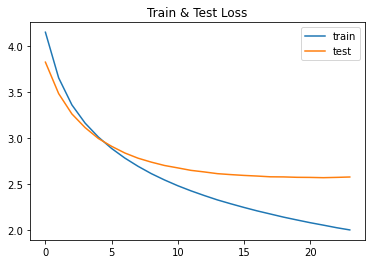

In [ ]:
# Visualization
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')

plt.title('Train & Test Loss')
plt.legend()
plt.show()


### Loss Analysis
Both train and test loss derecaes as the fit goes on, early-stopped at 24th epoch as validation loss increased for two epochs.

## 4. Compare Sentences: Inferred and Original


In [ ]:
# integer → word from 'text' set
src_index_to_word = src_tokenizer.index_word

# Word → integer from 'headlines' set
tar_word_to_index = tar_tokenizer.word_index 

# Integer → word from 'headlines' set
tar_index_to_word = tar_tokenizer.index_word 


In [ ]:
# Build encoder
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# Decoder - Tensor indicating states of 1 time-step ahead
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

# Decoder - Embedding Layer
dec_emb2 = dec_emb_layer(decoder_inputs)

# Decoder - LSTM preserve and use state_h and state_c
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])


In [ ]:
# Decoder - Attention Layer (hidden state layer)
decoder_hidden_state_input = Input(shape=(threshold_text, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# Decoder - Output Layer
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# Decoder Result
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])


In [ ]:
def decode_sequence(input_seq):
    # get state of encoder from the sequence
    e_out, e_h, e_c = encoder_model.predict(input_seq)

    # <SOS token>
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # Repeat loop until stop_condition == True

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eostoken'):
            decoded_sentence += ' ' + sampled_token

        #  <EOS token> or length_limit == STOP!
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (threshold_headline-1)):
            stop_condition = True

        # Update the target sequence (length ==1)
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update the state
        e_h, e_c = h, c

    return decoded_sentence


In [ ]:
# Integer Seq → Word Seq ('text')
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# Integer Seq → Word Seq ('headlines')
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if i not in [0, 1, 2]:
            temp = temp + tar_index_to_word[i]+' '
    return temp


In [ ]:
# Compare target headlines and predicted headlines
for i in range(0,8):
    print("Original text: ", seq2text(encoder_input_test[i]), "\n")
    print("Original headlines: ", seq2summary(decoder_input_test[i]))
    print("Predicted headlines: ", decode_sequence(encoder_input_test[i].reshape(1, threshold_text)))
    print("\n")


Original text:  cbi filed chargesheet kanpur gst commissioner chand bribery case chand first senior officer gst department established last year face corruption charges agency officials said cbi also charged wife others corruption criminal conspiracy among others  

Original headlines:  gst in case 
Predicted headlines:   cbi officers booked for corruption of yr old


Original text:  actor vivek revealed lived used public toilets get role film company director ram gopal varma found good looking part added finally met kept legs said yeh kya hai convinced  

Original headlines:  in used public toilet to get company role 
Predicted headlines:   people are like to be made


Original text:  us friday announced largest ever sanctions north korea claimed president donald trump sanctions target vessels shipping companies trade businesses north korea sanctions us imposing sanctions put pressure north korea nuclear ballistic missile programme  

Original headlines:  us announces largest ever san

## 5. Try Extract Summarization with `Summa`


In [ ]:
# Import Library
from summa.summarizer import summarize


In [ ]:
# Load original data (not processed) to pick a sample
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')
data.head(30)


Going to use the sentece below: 

```
Original text:  us friday announced largest ever sanctions north korea claimed president donald trump sanctions target vessels shipping companies trade businesses north korea sanctions us imposing sanctions put pressure north korea nuclear ballistic missile programme  

Original headlines:  us announces largest ever sanctions against north korea 
Predicted headlines:   us imposes sanctions on north korea sanctions
```

Find the original text from original dataset

In [ ]:
# Find the word 'Sanction'
data_sanctions = data[data.apply(lambda row: row.astype(str).str.contains('sanction').any(), axis=1) == True]
data_sanctions.head()


,headlines,text
24,Indian Oil looking for annual deal to buy crud...,Indian Oil Corporation on Wednesday said it's ...
210,US imposes sanctions on Venezuelan state-owned...,The US on Monday imposed sanctions on Venezuel...
255,"US charges Huawei with stealing trade secrets,...",The US has charged Huawei and its CFO Meng Wan...
292,"Centre approves Ã¢ÂÂ¹7,000 cr disaster relief...",The Centre on Tuesday approved additional Cent...
498,"Nearly 4,500 cases pending per High Court judg...","According to the National Judicial Data Grid, ..."


In [ ]:
# Find the word 'ballistic'
data_sanctions_ballistic =  data_sanctions[data_sanctions.apply(lambda row: row.astype(str).str.contains('ballistic').any(), axis=1) == True]
data_sanctions_ballistic.head()

# Found the index == 46444


,headlines,text
17033,Russia 'cheating' on North Korea sanctions: US...,"Addressing the Security Council on Monday, US ..."
29520,Iran lists demands to stay in nuclear deal,Iran's Supreme Leader Ayatollah Ali Khamenei h...
31019,Send dismantled nukes to US for easing sanctio...,US' National Security Advisor John Bolton has ...
31641,'Maximum pressure' against North Korea worked: US,"The ""maximum pressure"" campaign launched by US..."
33501,Australia to monitor North Korean ships' 'illi...,Australia will send military aircraft to the J...


In [ ]:
# Assign the text on variable 'text'
text = data['text'][46444]
text


'The US on Friday announced the largest-ever sanctions on North Korea as claimed by President Donald Trump. The sanctions will target more than 50 vessels, shipping companies, and trade businesses assisting North Korea in evading sanctions. The US has been imposing sanctions to put pressure on North Korea over its nuclear and ballistic missile programme.'

In [ ]:
# Test Extract Summarization
print('Summary with Extraction:\n')
print(summarize(text, ratio=0.5))


Summary with Extraction:

The US has been imposing sanctions to put pressure on North Korea over its nuclear and ballistic missile programme.


In [ ]:
# Result of Abstract Summarization
print("Summary with Abstraction:\n")
print(decode_sequence(encoder_input_test[2].reshape(1, threshold_text)))
      

Summary with Abstraction:

 us imposes sanctions on north korea sanctions


### Comparison
Extract Summarization has more grammatical sentences, and longer than Abstract summary.  
Abstract Summarization uses more general words. Some text doesn't make sense.
